In [2]:
import pandas as pd
df = pd.read_csv('Groceries_dataset.csv')

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df['Transaction'] = df['Member_number'].astype(str) + '_' + df['Date']

# Group by transaction and aggregate items
basket_df = df.groupby('Transaction')['itemDescription'].apply(list).reset_index()
transactions = basket_df['itemDescription'].tolist()

In [6]:
!pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)


  Using cached mlxtend-0.23.4-py3-none-any.whl.metadata (7.3 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 882.6 kB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 882.6 kB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 882.6 kB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 882.6 kB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 882.6 kB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 381.3 kB/s eta 0:00:02
   ------------------------------- -------- 1.0/1.4 MB 479.2 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 479.2 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 562.5 kB/s eta 0:00:00


In [7]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(encoded_df, min_support=0.03, use_colnames=True)
print(frequent_itemsets.head())


    support         itemsets
0  0.033950           (beef)
1  0.045312   (bottled beer)
2  0.060683  (bottled water)
3  0.037626    (brown bread)
4  0.035220         (butter)


In [8]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules = rules.sort_values(by='lift', ascending=False)

# Save to CSV
rules.to_csv('association_rules.csv', index=False)


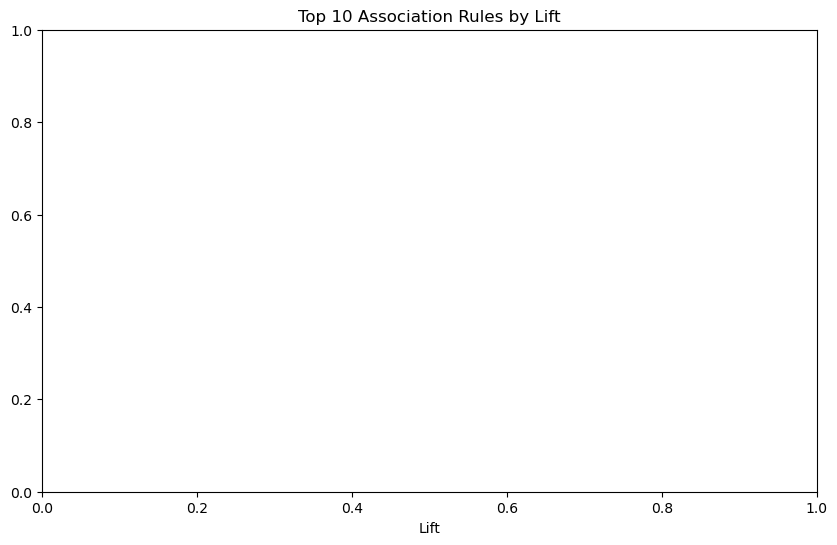

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
top_rules = rules.head(10)
sns.barplot(x='lift', y=top_rules.index, data=top_rules, palette='viridis')
plt.xlabel("Lift")
plt.title("Top 10 Association Rules by Lift")
plt.show()
